In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [4]:
y_train = pickle.load(open('Data/y_train.pkl', 'rb'))
y_test = pickle.load(open('Data/y_test.pkl', 'rb'))
y = pickle.load(open('Data/y.pkl', 'rb'))

# find the percentage of 1s in the training set
print('Percentage of 1s in the training set: ', y_train.sum()/len(y_train))

# find the percentage of 1s in the test set
print('Percentage of 1s in the test set: ', y_test.sum()/len(y_test))

# find the percentage of 1s in the whole dataset
print('Percentage of 1s in the whole dataset: ', y.sum()/len(y))

Percentage of 1s in the training set:  0.8054711246200608
Percentage of 1s in the test set:  0.8072289156626506
Percentage of 1s in the whole dataset:  0.8058252427184466


## Random Forest

In [17]:
all_dim_dict = pickle.load(open('Random Forest/rf_all_dim.pkl', 'rb'))
all_dim_dict

{'Model': RandomForestClassifier(min_samples_leaf=5, n_estimators=200, random_state=42),
 'Best Parameters': {'max_depth': None,
  'min_samples_leaf': 5,
  'min_samples_split': 2,
  'n_estimators': 200},
 'Training Set Accuracy': 0.9331943286071726,
 'Test Set Accuracy': 0.9036144578313253,
 'AUC Score': 0.7975746268656716}

In [18]:
pca_res = pd.read_csv('Random Forest/pca_rf_results.csv')
pca_res.head()

,n_components,train_accuracy,test_accuracy,auc_score
0,10,0.936225,0.939759,0.891325
1,11,0.930136,0.927711,0.860075
2,12,0.936225,0.939759,0.891325
3,13,0.936225,0.915663,0.828825
4,14,0.939227,0.915663,0.852612


In [19]:
pca_dict = pca_res.loc[pca_res['auc_score'].idxmax()]
pca_dict

n_components      10.000000
train_accuracy     0.936225
test_accuracy      0.939759
auc_score          0.891325
Name: 0, dtype: float64

In [20]:
rf_ae_dict = pickle.load(open('Random Forest/RF_AE.pkl', 'rb'))
rf_ae_dict

{'model': RandomForestClassifier(min_samples_leaf=2, n_estimators=50, random_state=42),
 'train_acc': 0.9332221295524047,
 'test_acc': 0.9156626506024096,
 'auc_score': 0.8288246268656716,
 'confusion_matrix': array([[11,  5],
        [ 2, 65]], dtype=int64),
 'classification_report':               precision    recall  f1-score    support
 0              0.846154  0.687500  0.758621  16.000000
 1              0.928571  0.970149  0.948905  67.000000
 accuracy       0.915663  0.915663  0.915663   0.915663
 macro avg      0.887363  0.828825  0.853763  83.000000
 weighted avg   0.912684  0.915663  0.912224  83.000000}

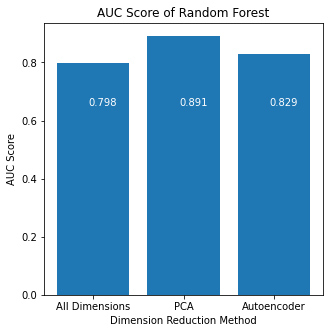

In [27]:
all_dim_auc = all_dim_dict['AUC Score']
pca_auc = pca_dict['auc_score']
rf_ae_auc = rf_ae_dict['auc_score']

plt.figure(figsize=(5, 5))
plt.bar(['All Dimensions', 'PCA', 'Autoencoder'], [all_dim_auc, pca_auc, rf_ae_auc])
plt.xlabel('Dimension Reduction Method')
plt.ylabel('AUC Score')
plt.title('AUC Score of Random Forest')
plt.text(-0.05, 0.65, round(all_dim_auc, 3), color='white')
plt.text(0.95, 0.65, round(pca_auc, 3), color='white')
plt.text(1.95, 0.65, round(rf_ae_auc, 3), color='white')
plt.savefig('Random Forest/rf_auc_scores.jpg', dpi=300, bbox_inches='tight')
plt.show()

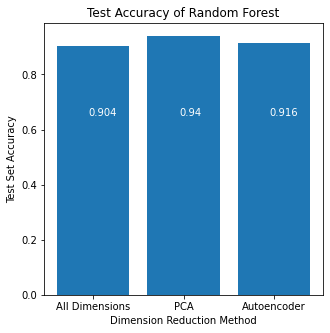

In [26]:
all_dim_acc = all_dim_dict['Test Set Accuracy']
pca_acc = pca_dict['test_accuracy']
rf_ae_acc = rf_ae_dict['test_acc']

plt.figure(figsize=(5, 5))
plt.bar(['All Dimensions', 'PCA', 'Autoencoder'], [all_dim_acc, pca_acc, rf_ae_acc])
plt.xlabel('Dimension Reduction Method')
plt.ylabel('Test Set Accuracy')
plt.title('Test Accuracy of Random Forest')
plt.text(-0.05, 0.65, round(all_dim_acc, 3), color='white')
plt.text(0.95, 0.65, round(pca_acc, 3), color='white')
plt.text(1.95, 0.65, round(rf_ae_acc, 3), color='white')
plt.savefig('Random Forest/rf_test_acc.jpg', dpi=300, bbox_inches='tight')
plt.show()

## SVM

In [28]:
svm_all_dim = pickle.load(open('SVM/svm_all_dim.pkl', 'rb'))
svm_all_dim

c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator SVC from version 1.3.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


{'Model': SVC(C=0.1, kernel='linear', probability=True),
 'Best Parameters': {'C': 0.1, 'kernel': 'linear'},
 'Training Set Accuracy': 0.9392549346677788,
 'Test Set Accuracy': 0.927710843373494,
 'AUC Score': 0.8600746268656717}

In [32]:
svm_pca = pd.read_csv('SVM/pca_svm_results.csv')

svm_pca_dict = svm_pca.loc[svm_pca['auc_score'].idxmax()]
svm_pca_dict

n_components      9.000000
train_accuracy    0.936197
test_accuracy     0.939759
auc_score         0.891325
Name: 7, dtype: float64

In [30]:
svm_ae_dict = pickle.load(open('SVM/SVM_AE.pkl', 'rb'))
svm_ae_dict

{'model': SVC(C=0.1, kernel='linear', probability=True),
 'train_acc': 0.9027244926327495,
 'test_acc': 0.9036144578313253,
 'auc_score': 0.8213619402985075,
 'confusion_matrix': array([[11,  5],
        [ 3, 64]], dtype=int64),
 'classification_report':               precision    recall  f1-score    support
 0              0.785714  0.687500  0.733333  16.000000
 1              0.927536  0.955224  0.941176  67.000000
 accuracy       0.903614  0.903614  0.903614   0.903614
 macro avg      0.856625  0.821362  0.837255  83.000000
 weighted avg   0.900197  0.903614  0.901110  83.000000}

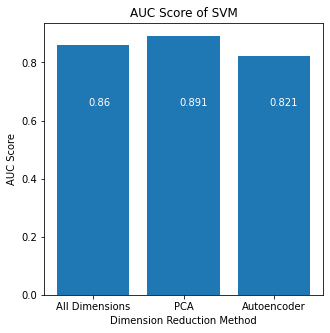

In [33]:
all_dim_auc = svm_all_dim['AUC Score']
pca_auc = svm_pca_dict['auc_score']
svm_ae_auc = svm_ae_dict['auc_score']

plt.figure(figsize=(5, 5))
plt.bar(['All Dimensions', 'PCA', 'Autoencoder'], [all_dim_auc, pca_auc, svm_ae_auc])
plt.xlabel('Dimension Reduction Method')
plt.ylabel('AUC Score')
plt.title('AUC Score of SVM')
plt.text(-0.05, 0.65, round(all_dim_auc, 3), color='white')
plt.text(0.95, 0.65, round(pca_auc, 3), color='white')
plt.text(1.95, 0.65, round(svm_ae_auc, 3), color='white')
plt.savefig('SVM/svm_auc_scores.jpg', dpi=300, bbox_inches='tight')
plt.show()

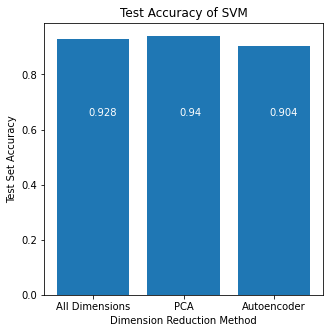

In [34]:
all_dim_acc = svm_all_dim['Test Set Accuracy']
pca_acc = svm_pca_dict['test_accuracy']
svm_ae_acc = svm_ae_dict['test_acc']

plt.figure(figsize=(5, 5))
plt.bar(['All Dimensions', 'PCA', 'Autoencoder'], [all_dim_acc, pca_acc, svm_ae_acc])
plt.xlabel('Dimension Reduction Method')
plt.ylabel('Test Set Accuracy')
plt.title('Test Accuracy of SVM')
plt.text(-0.05, 0.65, round(all_dim_acc, 3), color='white')
plt.text(0.95, 0.65, round(pca_acc, 3), color='white')
plt.text(1.95, 0.65, round(svm_ae_acc, 3), color='white')
plt.savefig('SVM/svm_acc_scores.jpg', dpi=300, bbox_inches='tight')
plt.show()

## AdaBoost

In [35]:
all_dim_dict = pickle.load(open('Adaboost/adaboost_all_dim.pkl', 'rb'))
all_dim_dict

{'Model': AdaBoostClassifier(n_estimators=200, random_state=42),
 'Best Parameters': {'learning_rate': 1.0, 'n_estimators': 200},
 'Training Set Accuracy': 0.9453433416736169,
 'Test Set Accuracy': 0.927710843373494,
 'AUC Score': 0.8838619402985075}

In [36]:
adaboost_pca = pickle.load(open('Adaboost/adaboost_PCA.pkl', 'rb'))
adaboost_pca

{'Model': AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42),
 'n_components': 11,
 'x_train': array([[ -1.60164246,  80.26061605,  92.53210386, ..., -25.93685497,
         -29.01502619, -17.94426104],
        [ -1.44790999, -10.00248372,  76.51764749, ..., -11.75492592,
          -5.45182645, -19.23885749],
        [-36.65433714,   1.39282575, -81.05119127, ...,  -6.21478364,
          -8.81749871, -11.88653957],
        ...,
        [118.13111884, -30.35089492,  15.40632602, ..., -20.1321586 ,
          35.31445158, -11.45783272],
        [-19.68740623,  -8.70935296,  56.1425256 , ..., -34.68590438,
          24.02407216, -34.82947235],
        [ 41.91168263, -21.76418395, -15.20395106, ..., -30.49528776,
          -1.48308213, -10.19036445]]),
 'x_test': array([[-2.27972020e+01,  2.01085187e+01, -4.20448762e+01,
          1.58326911e+01, -1.38904966e+00, -1.55327479e+01,
          2.61392186e+01, -7.65621129e+00,  1.81276461e+01,
          1.82919775e+00, -1.67

In [37]:
adaboost_ae = pickle.load(open('Adaboost/adaboost_AE.pkl', 'rb'))
adaboost_ae

{'model': AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42),
 'train_acc': 0.9210175145954963,
 'test_acc': 0.9156626506024096,
 'auc_score': 0.8288246268656716,
 'confusion_matrix': array([[11,  5],
        [ 2, 65]], dtype=int64),
 'classification_report':               precision    recall  f1-score    support
 0              0.846154  0.687500  0.758621  16.000000
 1              0.928571  0.970149  0.948905  67.000000
 accuracy       0.915663  0.915663  0.915663   0.915663
 macro avg      0.887363  0.828825  0.853763  83.000000
 weighted avg   0.912684  0.915663  0.912224  83.000000}

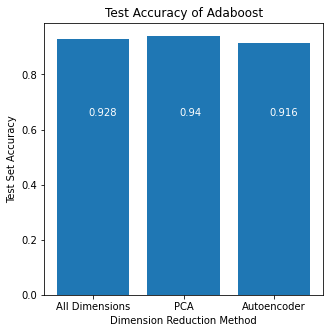

In [39]:
all_dim_acc = all_dim_dict['Test Set Accuracy']
pca_acc = adaboost_pca['Test Accuracy']
ae_acc = adaboost_ae['test_acc']

plt.figure(figsize=(5, 5))
plt.bar(['All Dimensions', 'PCA', 'Autoencoder'], [all_dim_acc, pca_acc, ae_acc])
plt.xlabel('Dimension Reduction Method')
plt.ylabel('Test Set Accuracy')
plt.title('Test Accuracy of Adaboost')
plt.text(-0.05, 0.65, round(all_dim_acc, 3), color='white')
plt.text(0.95, 0.65, round(pca_acc, 3), color='white')
plt.text(1.95, 0.65, round(ae_acc, 3), color='white')
plt.savefig('Adaboost/adaboost_acc_scores.jpg', dpi=300, bbox_inches='tight')
plt.show()

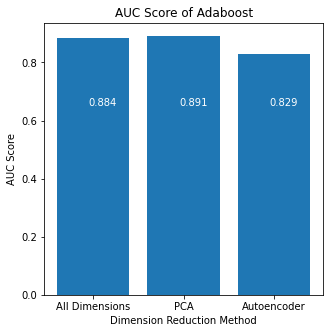

In [40]:
all_dim_auc = all_dim_dict['AUC Score']
pca_auc = adaboost_pca['AUC_score']
ae_auc = adaboost_ae['auc_score']

plt.figure(figsize=(5, 5))
plt.bar(['All Dimensions', 'PCA', 'Autoencoder'], [all_dim_auc, pca_auc, ae_auc])
plt.xlabel('Dimension Reduction Method')
plt.ylabel('AUC Score')
plt.title('AUC Score of Adaboost')
plt.text(-0.05, 0.65, round(all_dim_auc, 3), color='white')
plt.text(0.95, 0.65, round(pca_auc, 3), color='white')
plt.text(1.95, 0.65, round(ae_auc, 3), color='white')
plt.savefig('Adaboost/adaboost_auc_scores.jpg', dpi=300, bbox_inches='tight')
plt.show()

## Deep Learning Model

In [41]:
dl_all_dim = pd.read_csv('DL model/all_dim_results.csv')
dl_all_dim.head()

,epochs,lr,batch_size,acc,auc
0,5,0.001,16,0.903614,0.845149
1,5,0.001,32,0.915663,0.876399
2,5,0.001,64,0.927711,0.931437
3,5,0.001,128,0.903614,0.892724
4,5,0.010,16,0.903614,0.892724


In [42]:
dl_pca = pd.read_csv('DL model/PCA_DL_results.csv')
dl_pca.head()

,n_components,train_accuracy,test_accuracy,auc_score
0,5,0.981763,0.891566,0.837687
1,10,0.996960,0.891566,0.837687
2,20,0.996960,0.903614,0.868937
3,50,1.000000,0.903614,0.892724
4,100,1.000000,0.927711,0.931437


In [43]:
all_dim_best_auc = dl_all_dim.loc[dl_all_dim['auc'].idxmax()]
all_dim_best_auc

epochs        10.000000
lr             0.100000
batch_size    16.000000
acc            0.927711
auc            0.955224
Name: 20, dtype: float64

In [44]:
pca_best_auc = dl_pca.loc[dl_pca['auc_score'].idxmax()]
pca_best_auc

n_components      300.000000
train_accuracy      1.000000
test_accuracy       0.963855
auc_score           0.977612
Name: 6, dtype: float64

In [46]:
dl_ae = pickle.load(open('DL model/dl_ae_dict.pkl', 'rb'))
dl_ae

{'input_size': 64,
 'learning_rate': 0.1,
 'epochs': 100,
 'batch_size': 16,
 'test_accuracy': tensor(0.8916),
 'test_auc': 0.8614738805970149}

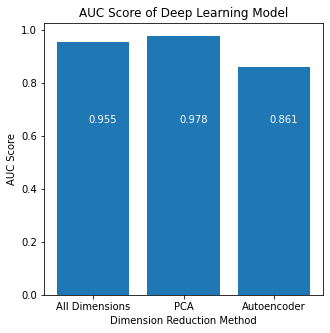

In [48]:
all_dim_auc = all_dim_best_auc['auc']
pca_auc = pca_best_auc['auc_score']
ae_auc = dl_ae['test_auc']

plt.figure(figsize=(5, 5))
plt.bar(['All Dimensions', 'PCA', 'Autoencoder'], [all_dim_auc, pca_auc, ae_auc])
plt.xlabel('Dimension Reduction Method')
plt.ylabel('AUC Score')
plt.title('AUC Score of Deep Learning Model')
plt.text(-0.05, 0.65, round(all_dim_auc, 3), color='white')
plt.text(0.95, 0.65, round(pca_auc, 3), color='white')
plt.text(1.95, 0.65, round(ae_auc, 3), color='white')
plt.savefig('DL model/dl_auc_scores.jpg', dpi=300, bbox_inches='tight')
plt.show()

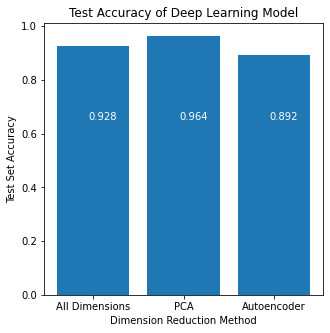

In [52]:
all_dim_acc = all_dim_best_auc['acc']
pca_acc = pca_best_auc['test_accuracy']
ae_acc = dl_ae['test_accuracy'].item()

plt.figure(figsize=(5, 5))
plt.bar(['All Dimensions', 'PCA', 'Autoencoder'], [all_dim_acc, pca_acc, ae_acc])
plt.xlabel('Dimension Reduction Method')
plt.ylabel('Test Set Accuracy')
plt.title('Test Accuracy of Deep Learning Model')
plt.text(-0.05, 0.65, round(all_dim_acc, 3), color='white')
plt.text(0.95, 0.65, round(pca_acc, 3), color='white')
plt.text(1.95, 0.65, round(ae_acc, 3), color='white')
plt.savefig('DL model/dl_acc_scores.jpg', dpi=300, bbox_inches='tight')
plt.show()

## Best Model

In [53]:
rf_all_dim_dict = pickle.load(open('Random Forest/rf_all_dim.pkl', 'rb'))
ada_all_dim_dict = pickle.load(open('Adaboost/adaboost_all_dim.pkl', 'rb'))

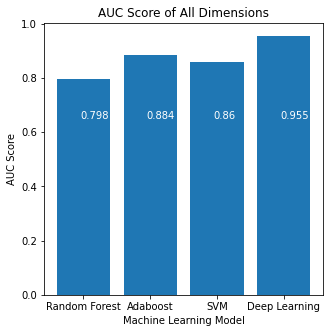

In [55]:
rf_all_dim_auc = rf_all_dim_dict['AUC Score']
ada_all_dim_auc = ada_all_dim_dict['AUC Score']
svm_all_dim_auc = svm_all_dim['AUC Score']
dl_all_dim_auc = all_dim_best_auc['auc']

plt.figure(figsize=(5, 5))
plt.bar(['Random Forest', 'Adaboost', 'SVM', 'Deep Learning'], [rf_all_dim_auc, ada_all_dim_auc, svm_all_dim_auc, dl_all_dim_auc])
plt.xlabel('Machine Learning Model')
plt.ylabel('AUC Score')
plt.title('AUC Score of All Dimensions')
plt.text(-0.05, 0.65, round(rf_all_dim_auc, 3), color='white')
plt.text(0.95, 0.65, round(ada_all_dim_auc, 3), color='white')
plt.text(1.95, 0.65, round(svm_all_dim_auc, 3), color='white')
plt.text(2.95, 0.65, round(dl_all_dim_auc, 3), color='white')
plt.savefig('Results/AUC Scores of All Dimensions.jpg', dpi=300, bbox_inches='tight')
plt.show()

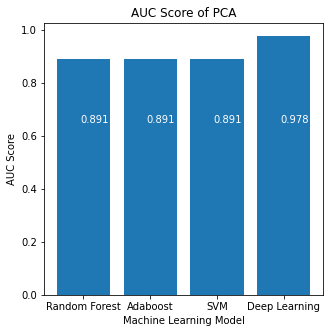

In [57]:
rf_pca_auc = pca_dict['auc_score']
ada_pca_auc = adaboost_pca['AUC_score']
svm_pca_auc = svm_pca_dict['auc_score']
dl_pca_auc = pca_best_auc['auc_score']

plt.figure(figsize=(5, 5))
plt.bar(['Random Forest', 'Adaboost', 'SVM', 'Deep Learning'], [rf_pca_auc, ada_pca_auc, svm_pca_auc, dl_pca_auc])
plt.xlabel('Machine Learning Model')
plt.ylabel('AUC Score')
plt.title('AUC Score of PCA')
plt.text(-0.05, 0.65, round(rf_pca_auc, 3), color='white')
plt.text(0.95, 0.65, round(ada_pca_auc, 3), color='white')
plt.text(1.95, 0.65, round(svm_pca_auc, 3), color='white')
plt.text(2.95, 0.65, round(dl_pca_auc, 3), color='white')
plt.savefig('Results/AUC Scores of PCA.jpg', dpi=300, bbox_inches='tight')
plt.show()

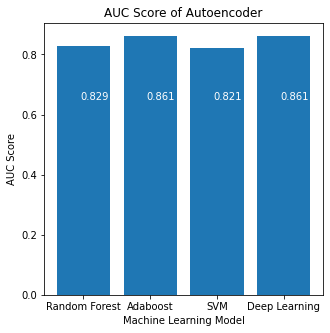

In [58]:
rf_ae_auc = rf_ae_dict['auc_score']
ada_ae_auc = dl_ae['test_auc']
svm_ae_auc = svm_ae_dict['auc_score']
dl_ae_auc = dl_ae['test_auc']

plt.figure(figsize=(5, 5))
plt.bar(['Random Forest', 'Adaboost', 'SVM', 'Deep Learning'], [rf_ae_auc, ada_ae_auc, svm_ae_auc, dl_ae_auc])
plt.xlabel('Machine Learning Model')
plt.ylabel('AUC Score')
plt.title('AUC Score of Autoencoder')
plt.text(-0.05, 0.65, round(rf_ae_auc, 3), color='white')
plt.text(0.95, 0.65, round(ada_ae_auc, 3), color='white')
plt.text(1.95, 0.65, round(svm_ae_auc, 3), color='white')
plt.text(2.95, 0.65, round(dl_ae_auc, 3), color='white')
plt.savefig('Results/AUC Scores of Autoencoder.jpg', dpi=300, bbox_inches='tight')
plt.show()